# Lab: Data Wrangling

In this exercise we will extract tabular data from an article published in an online scientific journal. We will touch on the following topics:

- Extraction of data from HTML pages
- Data cleanup using Pandas
- Data visualization
- CSV export
- FAIR data principles

## Extract data from a scientific paper

This will extract Table 1 from the scientific paper [_NMR determination of pKa values in α‐synuclein_](https://doi.org/10.1002/pro.556).
It is a nice study of the acid dissociation constants of amino acids inside a protein, measured using NMR spectroscopy.

The first extraction below is messy, so a bit of cleanup is needed.
Note that `pandas` requires that the `lxml` package is installed.
To run this, do the following:
1. Follow the link to the above paper, assuming you have full-text access
2. Save the page as `croke.html` and place it in this folder. The resulting `html` file may vary, depending on what browser (and probably year!) you're downloading. Your teacher may help you obtain a suitable version.
3. Run the cell below

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load HTML using Pandas. If on Colab, you must upload the HTML to your session.
df_original = pd.read_html("croke.html")

### Task 0

What is the type of `df_original`? We want to focus on the "No salt" data set, so go ahead and extract that.

### Task 1

The above table cannot be readily processed for various reasons. Firstly, the numbers are actually _strings_ and contain the unicode character `±`.
Secondly, values and errors are mixed.
Your task is now to cleanup the above table so that it looks something like this (we have only printed the first couple of rows here):

pKa   |  err |  resname | resnum
----- | ---- | -------- | -----------
3.61  | 0.05 | Asp      | 2
4.21  | 0.06 | Glu      | 13
...   | ...  | ...      | ...

In your report, document and motivate your code. Note how the residue name; error; and residue number have been separated to three individual columns.

#### Hints:
1. Do this in small steps!
1. This cleanup is mostly an exercise in how to use Pandas. There's plenty of online information about this and you may search for _"Delete pandas column"_ etc.
1. Try to run `df.pKa.str.split("±").str.get(0).astype(float)` in a cell. Figure out what each method is doing.
1. Columns can be assigned with `df.assign()` or dropped with `df.drop()`.
1. Some values in the `Site` column are suffixed by letters `c` and `d`. Use `str.replace()` to get rid of these.
1. Combined residue name and number can be split using [_regex_](https://en.wikipedia.org/wiki/Regular_expression), i.e. something like `str.split("([A-Za-z]+)(\d+)")`.

### Task 2

Export the above data to a `CSV` file. Motivate why or why not this is a good idea?

### Task 3

The acid dissocitation constant of an isolated glutamic acid ("Glu") is p$K_a^0$=4.1.
As a function of residue number, plot the shift from this reference value for all glutamates in the above tabel.
_Hints:_ Use `matplotlib` and a `pandas` mask using _e.g._ `mask = df.resname == "Glu"`.
Your plot could look something like the following:

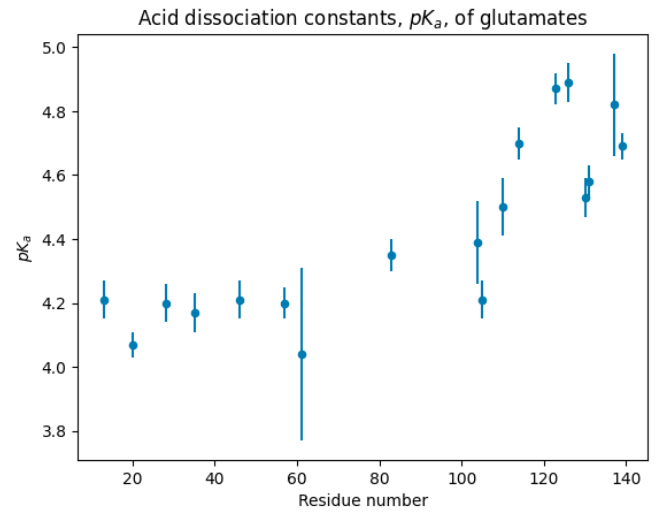

## Report

The report should be based on this Notebook and should in addition to answers to the above tasks include a discussion about how the original paper relates to the FAIR data principles. Detail how your workflow is an improvement with regard to the FAIR principles.